# Neste notebook, vamos usar uma das técnicas de redução de dimensionalidade mais populares em aprendizado de máquina:
# **Análise de Componentes Principais**

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

sns.set()
import os

import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
from sklearn.datasets import load_iris

iris_data = load_iris(as_frame=True)
iris_data = iris_data.frame

In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


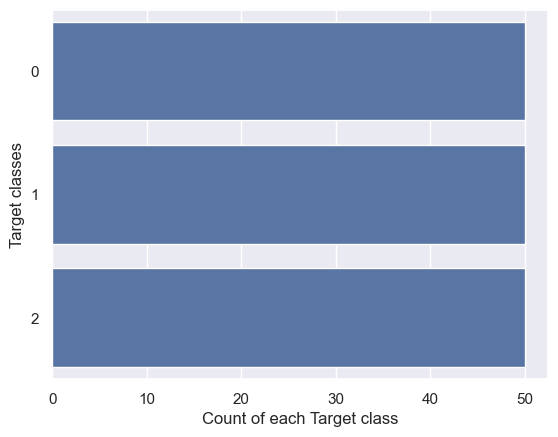

In [6]:
sns.countplot(y=iris_data.target, data=iris_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

#### Sobre o conjunto de dados :
1. 150 linhas
2. 4 características
3. Todas tem as mesmas unidades de medida (cm)
4. Não há dados faltantes
5. Há 3 classes: 'Iris-setosa', 'Iris-versicolor' e 'Iris-virginica'
6. Não há desbalanceamento, todas as classes tme o mesmo número de linhas (50 cada).

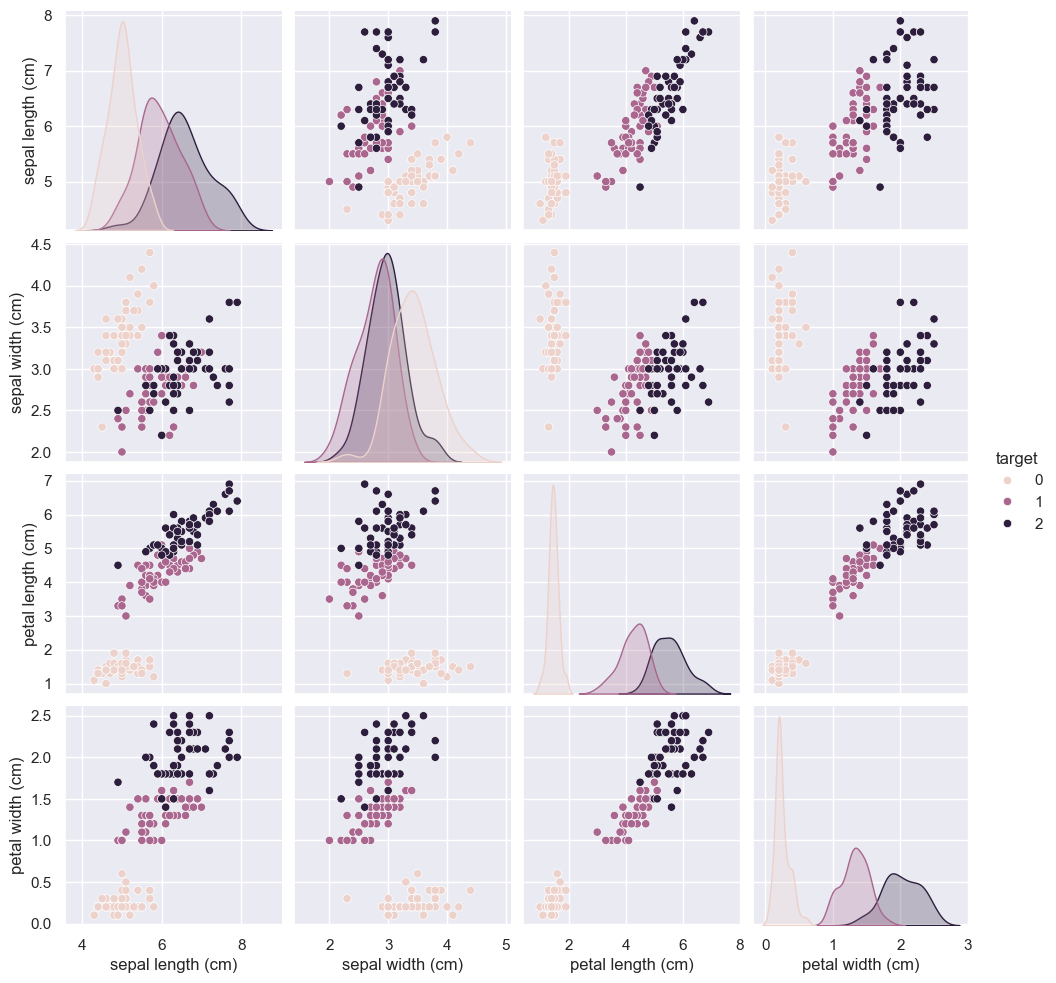

In [7]:
p = sns.pairplot(iris_data, hue="target")

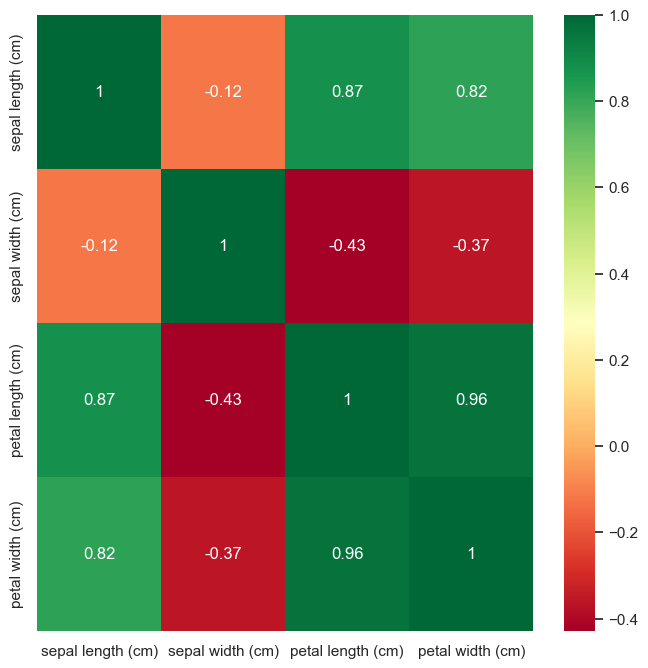

In [8]:
plt.figure(figsize=(8, 8))
p = sns.heatmap(iris_data.iloc[:, 0:4].corr(), annot=True, cmap="RdYlGn")

### Um dos objetivos da Análise Exploratória dos Dados (EDA) é identificar características que não são muito úteis para explicar o resultado desejado. O recurso sepal width (cm) parece ser menos relevante para explicar a classe alvo em comparação com outros recursos


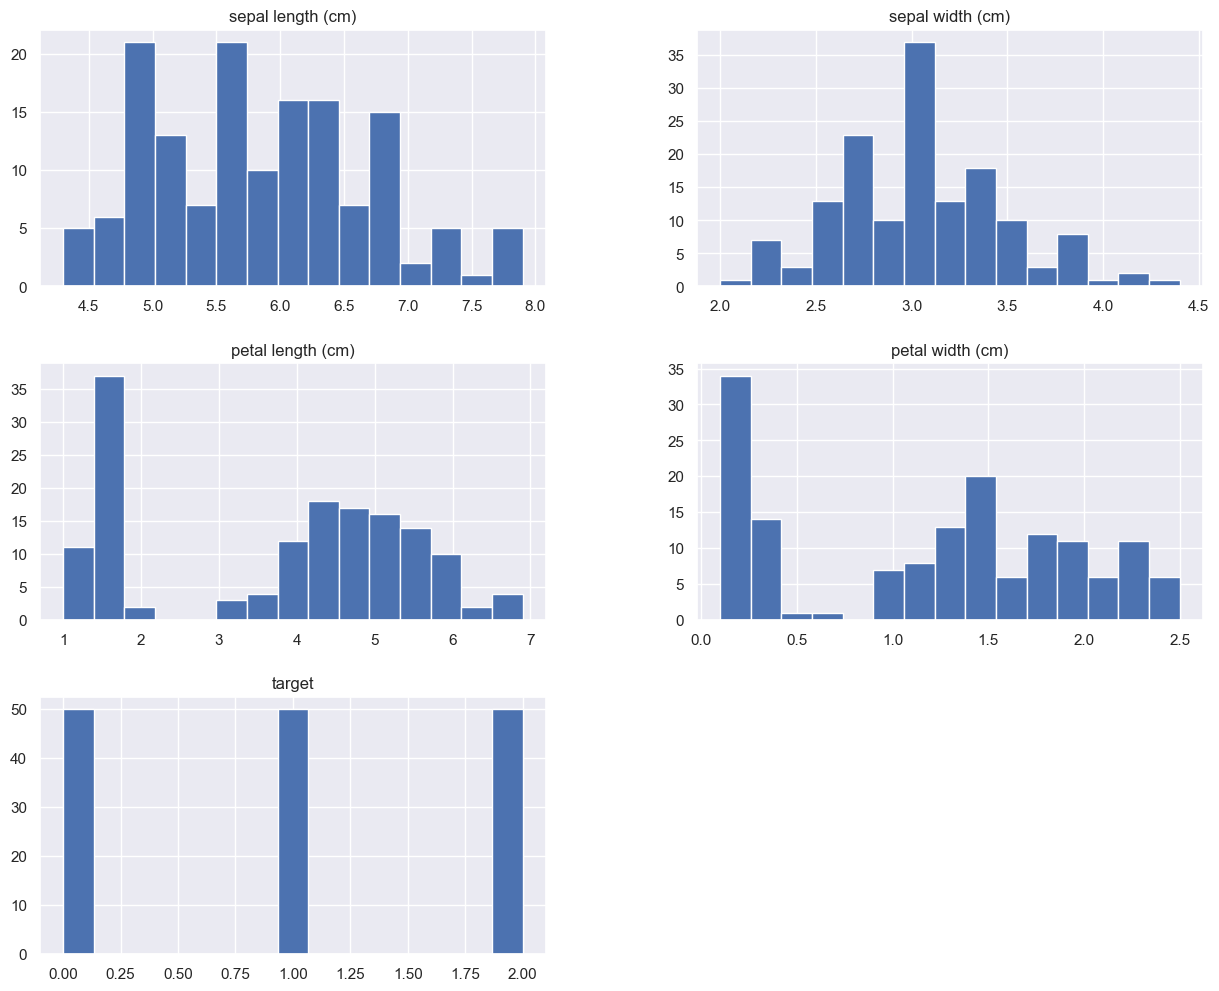

In [9]:
iris_data.hist(figsize=(15, 12), bins=15)
plt.title("Features Distribution")
plt.show()

#### As distribuições dos histogramas não parecem ideais.

# Preparação dos dados - SEM PCA

In [10]:
dados = torch.tensor(
    iris_data.values, dtype=torch.float32
)  # Convert DataFrame to NumPy array using .values
X = dados[:, 0:4]
d = dados[:, 4]

dados_treino, dados_teste, d_treino, d_teste = train_test_split(
    X, d, test_size=0.30, random_state=42
)

train_set = [(dados_treino[i, :], d_treino[i]) for i in range(dados_treino.shape[0])]

test_set = [(dados_teste[i, :], d_teste[i]) for i in range(dados_teste.shape[0])]

# Preparação dos dados - para PCA

É possível usar a função PCA do Sklearn como no código abaixo

In [11]:
# Número de componentes principais
N_comp = 1

In [12]:
# Usando a função PCA do sklearn

pca = PCA(n_components=N_comp)
dados2 = pca.fit_transform(iris_data.drop(columns=["target"]))

P2 = torch.tensor(dados2, dtype=torch.float32)

In [13]:
dados_treino_pca2, dados_teste_pca2, d_treino_pca2, d_teste_pca2 = train_test_split(
    P2, d, test_size=0.30, random_state=42
)

train_set_pca2 = [
    (dados_treino_pca2[i, :], d_treino_pca2[i])
    for i in range(dados_treino_pca2.shape[0])
]

test_set_pca2 = [
    (dados_teste_pca2[i, :], d_teste_pca2[i]) for i in range(dados_teste_pca2.shape[0])
]

In [14]:
# Calculando PCA manualmente

# Centralização dos dados
X_mean = torch.mean(X, axis=0)

X_centered = X - X_mean
print("X_mean\n", X_mean)
print("X_centered_mean\n", torch.mean(X_centered, axis=0))

# Matriz de covariância
S = (X_centered.T @ X_centered) / (X_centered.shape[0] - 1)
print("S\n", S)

# Autovalores e Autovetores
lb, u = torch.linalg.eig(S)
lb = lb.real
u = u.real
print("lb\n", lb)

# Verificação se os autovetores tem norma unitária
print(torch.norm(u[:, 0]))
print(torch.norm(u[:, 1]))
print(torch.norm(u[:, 2]))
print(torch.norm(u[:, 3]))

# Verificando se S*u=lb*u
print("Su_0=lb_0*u_0\n", S @ u[:, 0] - lb[0] * u[:, 0])
print("Su_1=lb_1*u_1\n", S @ u[:, 1] - lb[1] * u[:, 1])

# Porcentagem da variância explicada
porcentagem_variancia_explicada = []
for i in range(len(lb)):
    porcentagem_variancia_explicada.append(lb[i] / sum(lb))
print("porcentagem_variancia_explicada\n", porcentagem_variancia_explicada)

cum_explained_variance_ratios = np.cumsum(porcentagem_variancia_explicada)
print(
    "porcentagem_variancia_explicada acumulada\n", 100 * cum_explained_variance_ratios
)

# Vamos usar N_comp componentes principais
U_M = u[:, 0].reshape(-1, 1)
if N_comp > 1:
    for i in range(1, N_comp):
        U_M = torch.cat([U_M, u[:, i].reshape(-1, 1)], dim=1)


print("U_M\n", U_M)

# Aplicando a transformação nos dados para gerar as features
P = X_centered @ U_M

if N_comp == 1:
    P = P.reshape(-1, 1)

dados_treino_pca, dados_teste_pca, d_treino_pca, d_teste_pca = train_test_split(
    P, d, test_size=0.30, random_state=42
)

train_set_pca = [
    (dados_treino_pca[i, 0:N_comp], d_treino_pca[i])
    for i in range(dados_treino_pca.shape[0])
]

test_set_pca = [
    (dados_teste_pca[i, 0:N_comp], d_teste_pca[i])
    for i in range(dados_teste_pca.shape[0])
]

P_df = pd.DataFrame(P.numpy())
P_df["target"] = d.numpy()

if N_comp > 1:
    plt.figure()
    plt.figure(figsize=(5, 5))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)
    plt.xlabel("Componente Principal 1", fontsize=20)
    plt.ylabel("Component Principal 2", fontsize=20)
    plt.title("Análise de componentes Principais", fontsize=20)
    targets = ["0", "1", "2"]
    colors = ["r", "g", "b"]
    for target, color in zip(targets, colors):
        indices = P_df["target"] == int(target)
        plt.scatter(P_df.loc[indices, 0], P_df.loc[indices, 1], c=color, s=50)

    plt.legend(targets, prop={"size": 15})

X_mean
 tensor([5.8433, 3.0573, 3.7580, 1.1993])
X_centered_mean
 tensor([-3.9419e-07, -1.3351e-07, -1.4464e-07,  6.7552e-09])
S
 tensor([[ 0.6857, -0.0424,  1.2743,  0.5163],
        [-0.0424,  0.1900, -0.3297, -0.1216],
        [ 1.2743, -0.3297,  3.1163,  1.2956],
        [ 0.5163, -0.1216,  1.2956,  0.5810]])
lb
 tensor([4.2282, 0.2427, 0.0782, 0.0238])
tensor(1.0000)
tensor(1.)
tensor(1.)
tensor(1.0000)
Su_0=lb_0*u_0
 tensor([ 7.1526e-07, -9.2387e-07,  1.4305e-06,  7.1526e-07])
Su_1=lb_1*u_1
 tensor([-2.9802e-08,  3.2783e-07, -3.6508e-07, -1.8626e-07])
porcentagem_variancia_explicada
 [tensor(0.9246), tensor(0.0531), tensor(0.0171), tensor(0.0052)]
porcentagem_variancia_explicada acumulada
 [ 92.46187   97.768524  99.47879  100.      ]
U_M
 tensor([[-0.3614],
        [ 0.0845],
        [-0.8567],
        [-0.3583]])


In [15]:
# Comparando resultados do sklearn com os que foram calculados manualmente

print(P[:10])

print(P2[:10])

tensor([[2.6841],
        [2.7141],
        [2.8890],
        [2.7453],
        [2.7287],
        [2.2809],
        [2.8205],
        [2.6261],
        [2.8864],
        [2.6728]])
tensor([[-2.6841],
        [-2.7141],
        [-2.8890],
        [-2.7453],
        [-2.7287],
        [-2.2809],
        [-2.8205],
        [-2.6261],
        [-2.8864],
        [-2.6728]])


# Dados gerais do modelo

In [16]:
# Ajuste de hiperparâmetros

# passo de adaptação da rede MLP
eta = 0.001

# Tamanho do mini-batch
Nb = 16

# Número de épocas
Ne = 1000

 Modelo sem pca

In [17]:
class Model(nn.Module):
    # Geralmente, os blocos da rede são definidos no método __init__()
    def __init__(self):
        # Necessário chamar __init__() da classe mãe
        super().__init__()

        # Uma das formas de se definir um modelo é a sequencial
        self.model = nn.Sequential(
            # Entrada com 4 elementos, conectada a 16 neurônios
            nn.Linear(4, 16),
            # Função de ativação ReLU
            nn.ReLU(),
            # Saídas de 16 neurônios conectadas a 8 neurônios
            nn.Linear(16, 8),
            nn.Dropout(0.2),
            nn.ReLU(),
            # Saídas de 8 neurônios conectadas a 3 neurônios
            nn.Linear(8, 3),
        )

    # O método forward() define como é feito o cálculo progressivo
    # para obter a saída da rede, a partir da entrada x.
    # Nesse caso, como foi definido um modelo sequencial em
    # self.model, basta chamar self.model(x)
    def forward(self, x):
        output = self.model(x)
        return output

Modelo com PCA

In [18]:
class Model_pca(nn.Module):
    # Geralmente, os blocos da rede são definidos no método __init__()
    def __init__(self, N_comp):
        # Necessário chamar __init__() da classe mãe
        super().__init__()
        self.N_comp = N_comp

        # Uma das formas de se definir um modelo é a sequencial
        self.model = nn.Sequential(
            # Entrada com N_comp elementos, conectada a 16 neurônios
            nn.Linear(N_comp, 16),
            # Função de ativação ReLU
            nn.ReLU(),
            # Saídas de 16 neurônios conectadas a 8 neurônios
            nn.Linear(16, 8),
            nn.Dropout(0.2),
            nn.ReLU(),
            # Saídas de 8 neurônios conectadas a 3 neurônios
            nn.Linear(8, 3),
        )

    # O método forward() define como é feito o cálculo progressivo
    # para obter a saída da rede, a partir da entrada x.
    # Nesse caso, como foi definido um modelo sequencial em
    # self.model, basta chamar self.model(x)
    def forward(self, x):
        output = self.model(x)
        return output

In [19]:
device = torch.device("cpu")
model = Model().to(device=device)
model_pca = Model_pca(N_comp).to(device=device)


def weights_init(m):
    classname = m.__class__.__name__
    if classname.find("Linear") != -1:
        torch.nn.init.kaiming_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)


model.apply(weights_init)
model_pca.apply(weights_init)


loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=eta)
optimizer_pca = torch.optim.Adam(model_pca.parameters(), lr=eta)

Função para avaliar o modelo

In [20]:
def evaluate(model, test_loader):
    model.eval()
    correto = 0
    total = 0
    with torch.no_grad():  # Não calcular os gradientes durante a avaliação
        for X, d in test_loader:
            y = model(X)
            _, predito = torch.max(y, 1)
            total += d.size(0)
            correto += (predito == d).sum().item()

    print(f"Acurácia no conjunto de teste: {100 * correto / total:.2f}%")

Treinamento dos modelos

Época: 0 Loss: 1.6461007595062256 Acurácia: 28.12%
Época: 10 Loss: 0.6460334658622742 Acurácia: 62.50%
Época: 20 Loss: 0.7664394974708557 Acurácia: 55.21%
Época: 30 Loss: 0.5201902985572815 Acurácia: 82.29%
Época: 40 Loss: 0.5444474220275879 Acurácia: 77.08%
Época: 50 Loss: 0.4231266975402832 Acurácia: 81.25%
Época: 60 Loss: 0.4275297224521637 Acurácia: 83.33%
Época: 70 Loss: 0.31445392966270447 Acurácia: 89.58%
Época: 80 Loss: 0.3338967263698578 Acurácia: 86.46%
Época: 90 Loss: 0.26451703906059265 Acurácia: 82.29%
Época: 100 Loss: 0.29116183519363403 Acurácia: 85.42%
Época: 110 Loss: 0.2023361772298813 Acurácia: 86.46%
Época: 120 Loss: 0.17202609777450562 Acurácia: 86.46%
Época: 130 Loss: 0.11304623633623123 Acurácia: 90.62%
Época: 140 Loss: 0.3655698895454407 Acurácia: 89.58%
Época: 150 Loss: 0.22093604505062103 Acurácia: 92.71%
Época: 160 Loss: 0.12059725075960159 Acurácia: 95.83%
Época: 170 Loss: 0.3096728026866913 Acurácia: 91.67%
Época: 180 Loss: 0.19569307565689087 Acurácia: 93.

Text(0, 0.5, 'Loss')

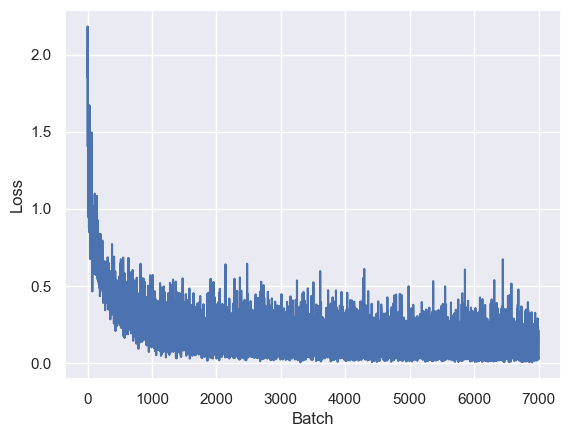

In [21]:
# Carregando os dados de treinamento
train_loader = torch.utils.data.DataLoader(train_set, batch_size=Nb, shuffle=True)

# Lista usada para guardar o valor da função custo ao longo das iterações
losses = []

# Loop das épocas
for epoch in range(Ne):
    correto = 0
    total = 0
    # Loop dos mini batches - note que é usado o DataLoader para obter
    # os sinais de entrada e desejado, X e d
    for n, (X, d) in enumerate(train_loader):
        # from IPython import embed; embed()
        # Envia os dados para a GPU, caso ela exista
        X = X.to(device=device)
        d = d.type(torch.LongTensor).to(device=device)

        # Coloca o modelo em modo treinamento. Isso não é necessário nesse
        # caso, pois não estamos fazendo validação. Mas é interessante manter
        # a linha para lembrar desse detalhe
        model.train()

        # Zera informações de gradientes: por padrão o PyTorch acumula os
        # gradientes a cada chamada de loss.backward(). Na maioria dos casos,
        # estamos interessados apenas no último valor dos gradientes
        model.zero_grad()

        # Calcula a saída
        y = model(X)

        # Calcula o valor da função custo
        loss = loss_function(y, d)

        # Calcula os gradientes
        loss.backward()

        # Atualiza os pesos do modelo, de acordo com as regras
        # do otimizador escolhido
        optimizer.step()

        # Armazena o valor da função custo
        losses.append(loss.item())

        # Calcula a acurácia
        _, predito = torch.max(y, 1)
        total += d.size(0)
        correto += (predito == d).sum().item()

        # Mostra o valor da função custo a cada 500 épocas
        if epoch % 10 == 0 and n == dados_treino.shape[0] // Nb - 1:
            print(f"Época: {epoch} Loss: {loss} Acurácia: {100 * correto / total:.2f}%")
#

plt.figure()
plt.plot(losses)
plt.xlabel("Batch")
plt.ylabel("Loss")

In [22]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size=Nb, shuffle=False)
evaluate(model, test_loader)

Acurácia no conjunto de teste: 97.78%


Época: 0 Loss: 1.8873236179351807 Acurácia: 34.38%
Época: 10 Loss: 1.093077301979065 Acurácia: 42.71%
Época: 20 Loss: 0.6673923134803772 Acurácia: 41.67%
Época: 30 Loss: 1.0872156620025635 Acurácia: 51.04%
Época: 40 Loss: 0.9686533808708191 Acurácia: 58.33%
Época: 50 Loss: 0.6763795614242554 Acurácia: 81.25%
Época: 60 Loss: 0.504429042339325 Acurácia: 83.33%
Época: 70 Loss: 0.6719186305999756 Acurácia: 78.12%
Época: 80 Loss: 0.5312221050262451 Acurácia: 83.33%
Época: 90 Loss: 0.25818830728530884 Acurácia: 85.42%
Época: 100 Loss: 0.5031403303146362 Acurácia: 82.29%
Época: 110 Loss: 0.493335485458374 Acurácia: 85.42%
Época: 120 Loss: 0.43816813826560974 Acurácia: 86.46%
Época: 130 Loss: 0.36798155307769775 Acurácia: 85.42%
Época: 140 Loss: 0.49597492814064026 Acurácia: 81.25%
Época: 150 Loss: 0.25195327401161194 Acurácia: 82.29%
Época: 160 Loss: 0.3635086715221405 Acurácia: 83.33%
Época: 170 Loss: 0.45029619336128235 Acurácia: 90.62%
Época: 180 Loss: 0.28973478078842163 Acurácia: 80.21%


Text(0, 0.5, 'Loss_pca')

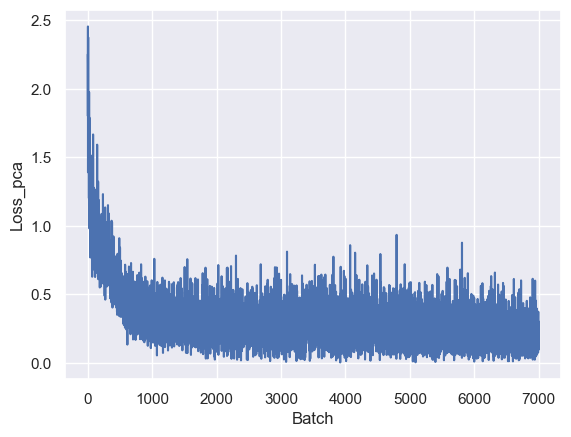

In [23]:
# Carregando os dados de treinamento
train_loader_pca = torch.utils.data.DataLoader(
    train_set_pca, batch_size=Nb, shuffle=True
)

# Lista usada para guardar o valor da função custo ao longo das iterações
losses_pca = []

# Loop das épocas
for epoch in range(Ne):
    correto = 0
    total = 0
    # Loop dos mini batches - note que é usado o DataLoader para obter
    # os sinais de entrada e desejado, X e d
    for n, (X, d) in enumerate(train_loader_pca):
        # from IPython import embed; embed()
        # Envia os dados para a GPU, caso ela exista
        X = X.to(device=device)
        d = d.type(torch.LongTensor).to(device=device)

        # Coloca o modelo em modo treinamento. Isso não é necessário nesse
        # caso, pois não estamos fazendo validação. Mas é interessante manter
        # a linha para lembrar desse detalhe
        model_pca.train()

        # Zera informações de gradientes: por padrão o PyTorch acumula os
        # gradientes a cada chamada de loss.backward(). Na maioria dos casos,
        # estamos interessados apenas no último valor dos gradientes
        model_pca.zero_grad()

        # Calcula a saída
        y = model_pca(X)

        # Calcula o valor da função custo
        loss = loss_function(y, d)

        # Calcula os gradientes
        loss.backward()

        # Atualiza os pesos do modelo, de acordo com as regras
        # do otimizador escolhido
        optimizer_pca.step()

        # Armazena o valor da função custo
        losses_pca.append(loss.item())

        # Calcula a acurácia
        _, predito = torch.max(y, 1)
        total += d.size(0)
        correto += (predito == d).sum().item()

        # Mostra o valor da função custo a cada 500 épocas
        if epoch % 10 == 0 and n == dados_treino.shape[0] // Nb - 1:
            print(f"Época: {epoch} Loss: {loss} Acurácia: {100 * correto / total:.2f}%")


plt.figure()
plt.plot(losses_pca)
plt.xlabel("Batch")
plt.ylabel("Loss_pca")

Avaliação do modelo

In [24]:
test_loader_pca = torch.utils.data.DataLoader(
    test_set_pca, batch_size=Nb, shuffle=False
)
evaluate(model_pca, test_loader_pca)

Acurácia no conjunto de teste: 97.78%
